In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [11]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [12]:
from tensorflow.keras import backend as K

In [13]:
if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [14]:
train_labels = tf.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tf.keras.utils.to_categorical(mnist_test_labels, 10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


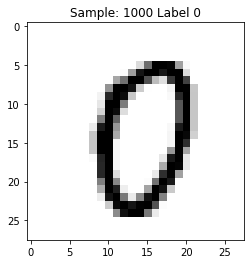

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def display_sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    image = train_images[num].reshape([28, 28])
    plt.title('Sample: %d Label %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1000)

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3),
                activation = 'relu',
                input_shape = input_shape))

model.add(Conv2D(64, (3,3), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2))) # note that the syntax MaxPooling2D changed to MaxPool2D

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [23]:
model.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [24]:
model_fitting = model.fit(train_images, train_labels,
                         batch_size=32,
                         epochs=5,
                         verbose=2,
                         validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 - 96s - loss: 0.1994 - accuracy: 0.9405 - val_loss: 0.0462 - val_accuracy: 0.9846
Epoch 2/5
60000/60000 - 99s - loss: 0.0817 - accuracy: 0.9761 - val_loss: 0.0361 - val_accuracy: 0.9885
Epoch 3/5
60000/60000 - 98s - loss: 0.0616 - accuracy: 0.9809 - val_loss: 0.0341 - val_accuracy: 0.9887
Epoch 4/5
60000/60000 - 98s - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0303 - val_accuracy: 0.9911
Epoch 5/5
60000/60000 - 97s - loss: 0.0427 - accuracy: 0.9864 - val_loss: 0.0306 - val_accuracy: 0.9916


In [25]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score [1])

Test loss:  0.030593563804336917
Test accuracy:  0.9916
